In [1]:
#!pip install numpy pandas matplotlib seaborn rich scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print as rprint
%matplotlib inline
sns.set()

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import (classification_report, roc_curve, roc_auc_score, 
                             recall_score, f1_score, precision_score, accuracy_score)

## toxic21

### Using All the data

#### Loading the data

In [3]:
#preprocessed dataset
tox21_x = pd.read_csv('tox21_x.csv')
tox21_y = pd.read_csv('tox21_y.csv')

In [4]:
tox21_x.describe()

,2,3,4,5,6,7,8,9,10,11,...,192,193,194,195,196,197,198,199,200,201
count,7237.000000,7237.000000,7.237000e+03,7.237000e+03,7.237000e+03,7.237000e+03,7.237000e+03,7237.000000,7237.000000,7.237000e+03,...,7.237000e+03,7.237000e+03,7.237000e+03,7237.000000,7237.000000,7.237000e+03,7.237000e+03,7.237000e+03,7237.000000,7237.000000
mean,0.787885,0.166118,1.984355e-01,2.039553e-01,2.068306e-01,1.850273e-01,2.082870e-01,0.215113,0.221954,2.355411e-01,...,3.136544e-02,7.461655e-03,5.803510e-03,0.171596,0.179345,1.519967e-03,9.810695e-03,1.387142e-01,0.189088,0.454290
std,0.281241,0.242325,2.787116e-01,2.794402e-01,2.822119e-01,2.679432e-01,2.831836e-01,0.285533,0.294245,3.020465e-01,...,1.743121e-01,8.606394e-02,7.596464e-02,0.051631,0.099099,3.895980e-02,9.856870e-02,3.435277e-01,0.134950,0.254090
min,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.001331
25%,0.724467,0.007619,6.651016e-03,7.268986e-03,6.629760e-03,5.705117e-03,7.832177e-03,0.007818,0.008778,7.892904e-03,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.260200
50%,0.921382,0.045213,4.929508e-02,5.594714e-02,5.391179e-02,4.421553e-02,5.747922e-02,0.058038,0.065599,7.040545e-02,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.426815
75%,0.975284,0.224929,2.899306e-01,3.124972e-01,3.212729e-01,2.583289e-01,3.224368e-01,0.360056,0.349441,4.069311e-01,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.644776
max,0.999740,1.000000,9.999127e-01,9.998083e-01,9.998569e-01,9.999153e-01,9.997883e-01,0.999884,0.999655,9.996307e-01,...,9.999919e-01,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.998881


In [5]:
tox21_x.head()

,2,3,4,5,6,7,8,9,10,11,...,192,193,194,195,196,197,198,199,200,201
0,0.934799,0.177418,0.046765,0.033326,0.060566,0.039962,0.029073,0.141434,0.024657,0.228561,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,1.00000,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.975867
1,0.875932,0.047173,0.029397,0.031876,0.021488,0.033104,0.040950,0.025747,0.036181,0.019621,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,1.000000,0.738638
2,0.967576,0.059713,0.178132,0.308372,0.257215,0.133949,0.290161,0.221362,0.231685,0.153900,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.878233
3,0.998591,0.009412,0.013743,0.002718,0.008883,0.002707,0.001133,0.048074,0.004498,0.305146,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.193474
4,0.996279,0.014875,0.248635,0.451559,0.397276,0.081282,0.249279,0.185958,0.757884,0.673664,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.353220


In [6]:
tox21_y.describe()

,NR-AR
count,7237.000000
mean,0.042835
std,0.202500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
tox21_y['NR-AR'].unique()

array([0., 1.])

In [8]:
tox21_x.shape

(7237, 190)

In [9]:
tox21_y.shape

(7237, 1)

#### Preparing the data
We split the data with 80% as train dataset and 20% as test. We apply StandardScaler before feeding it to the models and use stratify to ensure that there is always a portion of positive in both train and test data

In [10]:
normalizer = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(tox21_x.to_numpy(), tox21_y.to_numpy().flatten(), train_size=0.8, stratify=tox21_y.to_numpy().flatten())
normalizer.fit(X_train);

#### Logistic Regression

In [11]:
#building the model
logistic_regression = LogisticRegression(max_iter=1000)

In [12]:
#train
logistic_regression.fit(normalizer.transform(X_train), y_train)

LogisticRegression(max_iter=1000)

In [13]:
#evaluation
y_pred = logistic_regression.predict(normalizer.transform(X_test))

In [14]:
def generate_report(y_pred, y_test, title='model', target_names=['safe', 'toxic']):
    """
        function to generate appropriate report based on predictions
    """
    rprint('[red]' + title + f" [black]recall score = {recall_score(y_test, y_pred):.4f}")
    rprint('[red]' + title + ' [black]classification report:')
    rprint(classification_report(y_test, y_pred, target_names=target_names))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, 'b-')
    plt.grid(True)
    plt.title(title + f' Roc Curve auc_score = {auc:.2f}')
    plt.show()

Logistic Regression recall score = 0.3387

Logistic Regression classification report:

precision    recall  f1-score   support

        safe       0.97      0.99      0.98      1386
       toxic       0.68      0.34      0.45        62

    accuracy                           0.96      1448
   macro avg       0.82      0.67      0.72      1448
weighted avg       0.96      0.96      0.96      1448

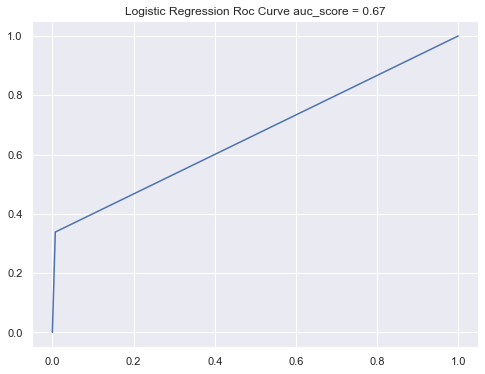

In [15]:
#report
generate_report(y_pred, y_test, 'Logistic Regression')

##### Cross-Validation 

In [16]:
#using StratifiedKFold because the positive data is so small (see Equalizing data distribution below) 
kfold = StratifiedKFold(n_splits=5, shuffle=True)
fprs = []
tprs = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
X = tox21_x.to_numpy()
y = tox21_y.to_numpy().flatten()
for train_indx, test_indx in kfold.split(X, y):
    normalizer = StandardScaler()
    X_train, y_train = X[train_indx], y[train_indx]
    X_test, y_test = X[test_indx], y[test_indx]
    normalizer.fit(X_train)
    #building the model
    logistic_regression = LogisticRegression(max_iter=1000)
    #train
    logistic_regression.fit(normalizer.transform(X_train), y_train)
    #evaluation
    y_pred = logistic_regression.predict(normalizer.transform(X_test))
    f, t, _ = roc_curve(y_test, y_pred)
    fprs.append(f)
    tprs.append(t)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


In [17]:

def generate_cv_results(fprs, tprs, accuracies, recalls, precisions, f1_scores, title):
    df = pd.DataFrame.from_dict({"k":range(1, len(accuracies) + 1),
                                'accuracy':accuracies,
                                'recall':recalls,
                                'precision':precisions,
                                'f1':f1_scores})
    plt.figure(figsize=(12, 10))
    for k, (f, t) in enumerate(zip(fprs, tprs)):
        plt.plot(f, t, label=f'k={k+1}')
    plt.title(title + ' Roc Curve')
    plt.legend(loc='best')
    plt.show()
    
    return df
    

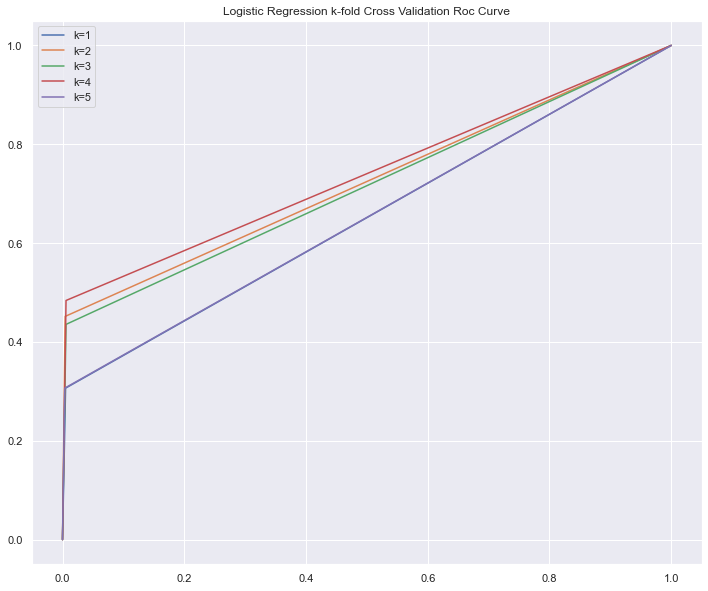

In [18]:
df_lgr = generate_cv_results(fprs, tprs, accuracies, recalls, precisions, f1_scores, 'Logistic Regression k-fold Cross Validation')

In [19]:
rprint("[red]Logistic Regression's cross validation scores")
df_lgr

Logistic Regression's cross validation scores

,k,accuracy,recall,precision,f1
0,1,0.965470,0.306452,0.730769,0.431818
1,2,0.972376,0.451613,0.823529,0.583333
2,3,0.970283,0.435484,0.771429,0.556701
3,4,0.972357,0.483871,0.789474,0.600000
4,5,0.966828,0.306452,0.791667,0.441860


#### Perceptron

In [20]:
#building the model
perceptron = Perceptron()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
normalizer = StandardScaler().fit(X_train)

In [22]:
#train
perceptron.fit(normalizer.transform(X_train), y_train)

Perceptron()

In [23]:
#evaluation
y_pred = perceptron.predict(normalizer.transform(X_test))

Perceptron recall score = 0.3582

Perceptron classification report:

precision    recall  f1-score   support

        safe       0.97      0.99      0.98      1381
       toxic       0.65      0.36      0.46        67

    accuracy                           0.96      1448
   macro avg       0.81      0.67      0.72      1448
weighted avg       0.95      0.96      0.96      1448

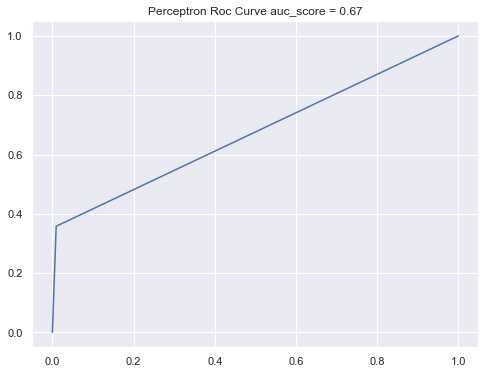

In [24]:
generate_report(y_pred, y_test, 'Perceptron')

##### Cross Validation

In [25]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
fprs = []
tprs = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
X = tox21_x.to_numpy()
y = tox21_y.to_numpy().flatten()
for train_indx, test_indx in kfold.split(X, y):
    normalizer = StandardScaler()
    X_train, y_train = X[train_indx], y[train_indx]
    X_test, y_test = X[test_indx], y[test_indx]
    normalizer.fit(X_train)
    #building the model
    perceptron = Perceptron()
    #train
    perceptron.fit(normalizer.transform(X_train), y_train)
    #evaluation
    y_pred = perceptron.predict(normalizer.transform(X_test))
    f, t, _ = roc_curve(y_test, y_pred)
    fprs.append(f)
    tprs.append(t)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


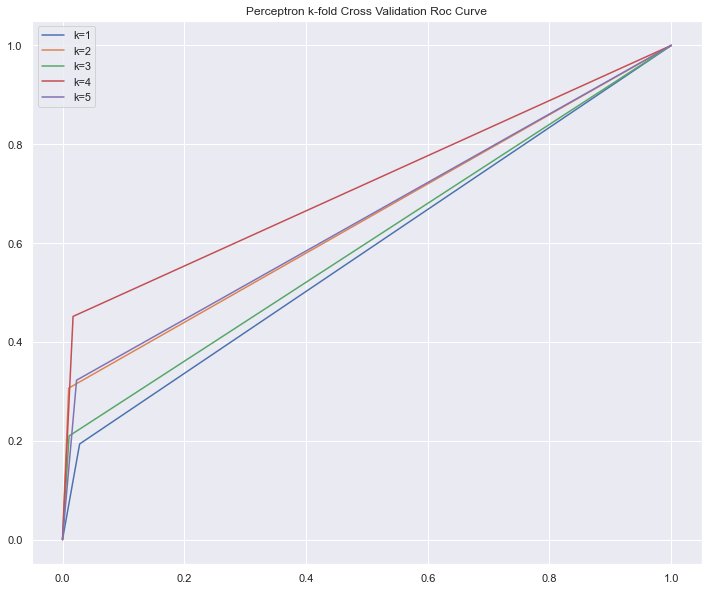

In [26]:
df_per = generate_cv_results(fprs, tprs, accuracies, recalls, precisions, f1_scores, 'Perceptron k-fold Cross Validation')

In [27]:
rprint("[red]Perceptron's cross-validation results")
df_per

Perceptron's cross-validation results

,k,accuracy,recall,precision,f1
0,1,0.938536,0.193548,0.235294,0.212389
1,2,0.960635,0.306452,0.575758,0.400000
2,3,0.955771,0.209677,0.464286,0.288889
3,4,0.959917,0.451613,0.538462,0.491228
4,5,0.948860,0.322581,0.384615,0.350877


### Equalizing data distribution
At first glance the models work 'ok' since the overall accuracy is 97% but are they really?!
Our purpose here is to train a model to distinct toxic gasses from the safe ones so we need a model that precisely detects the toxic gasses and doesn't label a toxic gas as non-toxic hence we need to maximize 'True Positives' and minimize the 'False Negatives' in our model and since $recall = \frac{TP}{TP + FN}$ then we need a model that it's recall score is high but as we can see most of the time (based on the data distribution in train and test dataset) our recall score is even below 0.3, why is this happening?

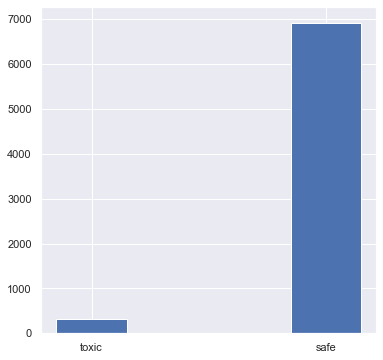

In [28]:
m = tox21_x.shape[0]
num_positives = np.count_nonzero(tox21_y['NR-AR'].to_numpy())
num_negatives = m - num_positives
plt.figure(figsize=(6, 6))
plt.bar(['toxic', 'safe'], [num_positives, num_negatives], width=0.3)
plt.show()

As we can see our dataset distribution is quite uneven and that's why the recall score for models is so low. In this section we try to even out the distribution of the training dataset

In [29]:
positive_samples = (tox21_y['NR-AR'] == 1.0)
X_positive = tox21_x[positive_samples].to_numpy()
X_negative = tox21_x[~positive_samples].to_numpy()
y_positive = tox21_y[positive_samples].to_numpy()
y_negative = tox21_y[~positive_samples].to_numpy()

In [30]:
#split train and train for each class
X_positive_train, X_positive_test, y_positive_train, y_positive_test = train_test_split(
    X_positive, y_positive, test_size=0.2, shuffle=True)
#we select only a small portion of negative class data points for training (80% more)
X_negative_train, X_negative_test, y_negative_train, y_negative_test = train_test_split(
    X_negative, y_negative, train_size=int(1.8 * X_positive_train.shape[0]), shuffle=True)
# merge
X_train = np.r_[X_positive_train, X_negative_train]
X_test = np.r_[X_positive_test, X_negative_test]
y_train = np.r_[y_positive_train, y_negative_train].flatten()
y_test = np.r_[y_positive_test, y_negative_test].flatten()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(694, 190) (6543, 190) (694,) (6543,)


In [31]:
#shuffle the training dataset
shuffled_index = np.random.permutation(range(X_train.shape[0]))
X_train, y_train = X_train[shuffled_index], y_train[shuffled_index]
print(X_train.shape, y_train.shape)

(694, 190) (694,)


number of positives in train dataset 248

number of positives in test dataset 62

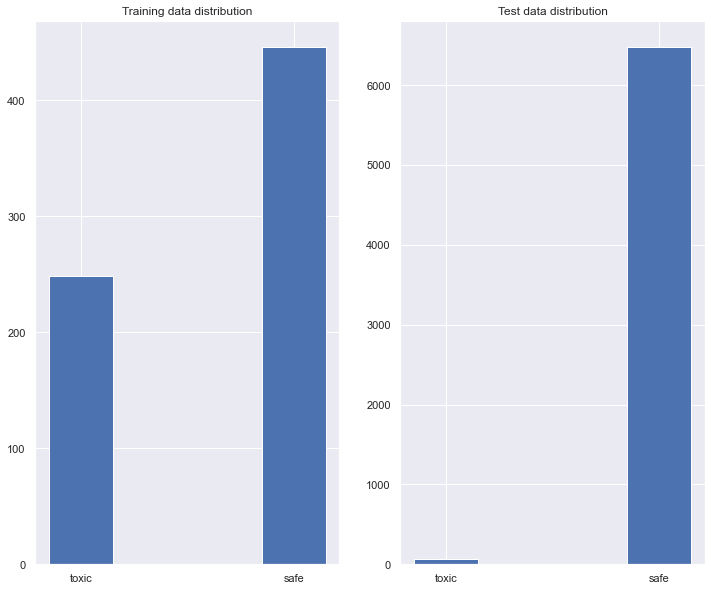

In [32]:
m = X_train.shape[0]
num_positives = np.count_nonzero(y_train)
num_negatives = m - num_positives
rprint(f"number of positives in train dataset {num_positives}")

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots(1, 2)
ax[0].bar(['toxic', 'safe'], [num_positives, num_negatives], width=0.3)
ax[0].set_title('Training data distribution')

m = X_test.shape[0]
num_positives = np.count_nonzero(y_test)
num_negatives = m - num_positives
rprint(f"number of positives in test dataset {num_positives}")
ax[1].bar(['toxic', 'safe'], [num_positives, num_negatives], width=0.3)
ax[1].set_title('Test data distribution')

plt.show()

#### Training with the equalized data 

In [33]:
normalizer = StandardScaler()
normalizer.fit(X_train);

Logsitic Regression with balanced data recall score = 0.6774

Logsitic Regression with balanced data classification report:

precision    recall  f1-score   support

        safe       1.00      0.80      0.89      6481
       toxic       0.03      0.68      0.06        62

    accuracy                           0.80      6543
   macro avg       0.51      0.74      0.47      6543
weighted avg       0.99      0.80      0.88      6543

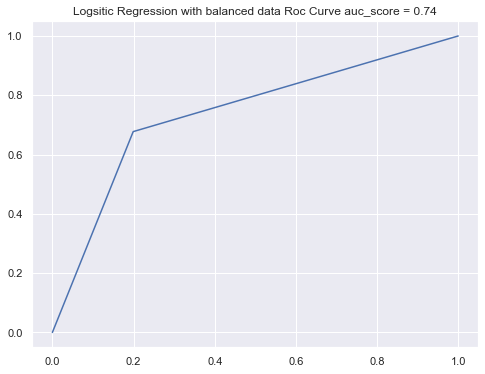

In [34]:

logistic_regression = LogisticRegression(max_iter=1000)
#train
logistic_regression.fit(normalizer.transform(X_train), y_train)
#eval
y_pred = logistic_regression.predict(normalizer.transform(X_test))
#report
generate_report(y_pred, y_test, title='Logsitic Regression with balanced data')
plt.show()

Perceptron with balanced data recall score = 0.6129

Perceptron with balanced data classification report:

precision    recall  f1-score   support

        safe       0.99      0.72      0.84      6481
       toxic       0.02      0.61      0.04        62

    accuracy                           0.72      6543
   macro avg       0.51      0.67      0.44      6543
weighted avg       0.99      0.72      0.83      6543

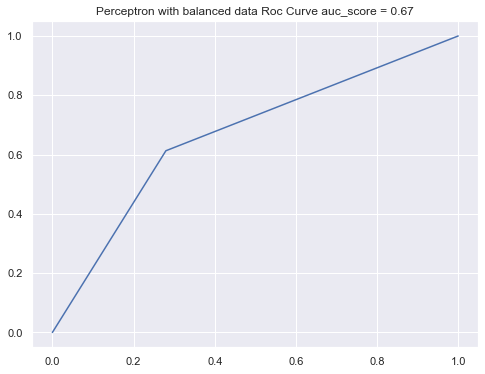

In [35]:
normalizer = StandardScaler()
normalizer.fit(X_train)
perceptron = Perceptron()
#train
perceptron.fit(normalizer.transform(X_train), y_train)
#eval
y_pred = perceptron.predict(normalizer.transform(X_test))
#report
generate_report(y_pred, y_test, 'Perceptron with balanced data')

#### Cross Validation

In [36]:
positive_samples = (tox21_y['NR-AR'] == 1.0)
X_positive = tox21_x[positive_samples].to_numpy()
X_negative = tox21_x[~positive_samples].to_numpy()
y_positive = tox21_y[positive_samples].to_numpy()
y_negative = tox21_y[~positive_samples].to_numpy()

def balanced_kfold(model):
    kf_positive = KFold(n_splits=5, shuffle=True)
    kf_negative = KFold(n_splits=5, shuffle=True)

    fprs = []
    tprs = []
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []
    positive_split = kf_positive.split(X_positive, y_positive)
    negative_split = kf_negative.split(X_negative, y_negative)
    for (trindx_positive, tsindx_positive), (trindx_negative, tsindx_negative) in zip(positive_split, negative_split):
        normalizer = StandardScaler()
        #for positives we follow the output of kfold
        Xtr_positive, ytr_positive = X_positive[trindx_positive], y_positive[trindx_positive]
        Xts_positive, yts_positive = X_positive[tsindx_positive], y_positive[tsindx_positive]
        #for negatives we need to sample a small portion randomly
        negtr_perm = np.random.permutation(trindx_negative)
        ntr_negative = int(1.8 * Xtr_positive.shape[0])
        #so we choose 1.8 * num_positives of train_indexes of kfold output as training data
        Xtr_negative, ytr_negative = X_negative[negtr_perm[:ntr_negative]], y_negative[negtr_perm[:ntr_negative]]
        # we use the ramining training points for evaluation
        Xts_negative = np.r_[X_negative[negtr_perm[ntr_negative:]], X_negative[tsindx_negative]]
        yts_negative = np.r_[y_negative[negtr_perm[ntr_negative:]], y_negative[tsindx_negative]]
        #now we can form a unified X and y
        X_train = np.r_[Xtr_positive, Xtr_negative]
        y_train = np.r_[ytr_positive, ytr_negative].flatten()
        X_test = np.r_[Xts_positive, Xts_negative]
        y_test = np.r_[yts_positive, yts_negative].flatten()
        # shuffle training data so that positives and negatives wouldn't be oredered
        shuffle_tr = np.random.permutation(range(X_train.shape[0]))
        X_train, y_train = X_train[shuffle_tr], y_train[shuffle_tr]

        normalizer.fit(X_train)
        #building the model
        model_instance = model()
        #train
        model_instance.fit(normalizer.transform(X_train), y_train)
        #evaluation
        y_pred = model_instance.predict(normalizer.transform(X_test))
        f, t, _ = roc_curve(y_test, y_pred)
        fprs.append(f)
        tprs.append(t)
        accuracies.append(accuracy_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    return (fprs, tprs, accuracies, recalls, precisions, f1_scores)

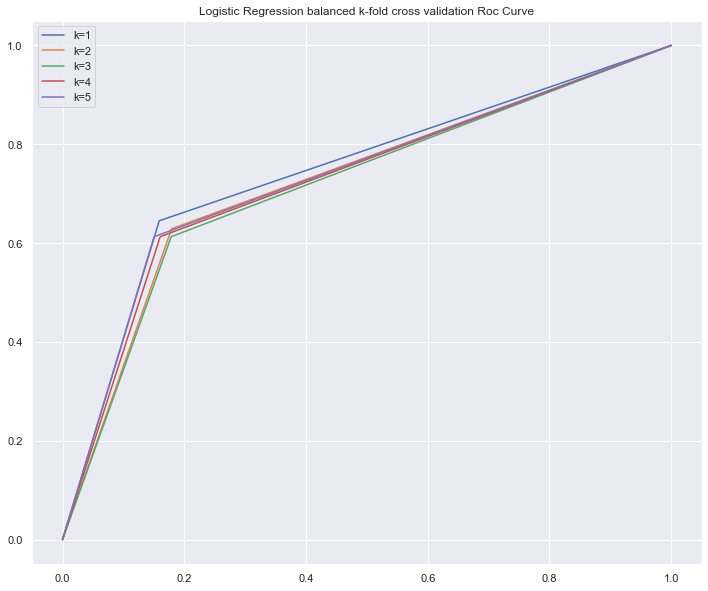

In [37]:
fprs, tprs, accuracies, recalls, precisions, f1_scores = balanced_kfold(lambda: LogisticRegression(max_iter=1000))
df_lgr = generate_cv_results(fprs, tprs, accuracies, recalls, precisions, f1_scores, 'Logistic Regression balanced k-fold cross validation')

In [38]:
rprint('[red]Logistic Regression balanced k-fold cross validation scores')
df_lgr

Logistic Regression balanced k-fold cross validation scores

,k,accuracy,recall,precision,f1
0,1,0.839217,0.645161,0.037383,0.070671
1,2,0.818890,0.629032,0.032473,0.061758
2,3,0.819502,0.612903,0.031799,0.060461
3,4,0.837383,0.612903,0.035250,0.066667
4,5,0.847318,0.612903,0.037512,0.070698


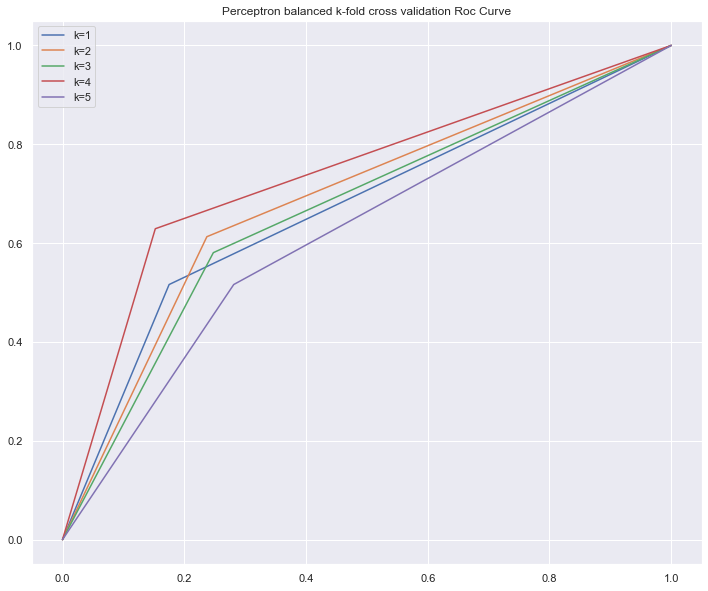

In [39]:
fprs, tprs, accuracies, recalls, precisions, f1_scores = balanced_kfold(lambda: Perceptron())
df_per = generate_cv_results(fprs, tprs, accuracies, recalls, precisions, f1_scores, 'Perceptron balanced k-fold cross validation')

In [40]:
rprint('[red]Logistic Regression balanced k-fold cross validation scores')
df_per

Logistic Regression balanced k-fold cross validation scores

,k,accuracy,recall,precision,f1
0,1,0.821947,0.516129,0.027421,0.052075
1,2,0.761424,0.612903,0.024127,0.046426
2,3,0.750573,0.580645,0.021924,0.042254
3,4,0.845484,0.629032,0.037975,0.071625
4,5,0.716797,0.516129,0.017251,0.033385
